# Rating Prediction using review text

In [1]:
import pandas as pd
import json
from tqdm import tqdm
line_count = len(open("yelp_dataset/review.json").readlines())
user_ids, business_ids, stars, dates,reviews = [], [], [], [],[]
with open("yelp_dataset/review.json") as f:
    for line in tqdm(f, total=line_count):
        blob = json.loads(line)
        user_ids += [blob["user_id"]]
        business_ids += [blob["business_id"]] 
        stars += [blob["stars"]]
        dates += [blob["date"]]
        reviews +=[blob["text"]]
ratings=pd.DataFrame({"user_id": user_ids, "business_id": business_ids, "rating": stars, "date": dates,"reviews":reviews})
user_counts = ratings["user_id"].value_counts()
active_users = user_counts.loc[user_counts >= 5].index.tolist()

100%|██████████| 6685900/6685900 [00:44<00:00, 149571.84it/s]


First we will divide the whole dataset into two parts, one is the latest rating for active users, the other is the remaining data.

In [2]:
sorted_ratings=ratings.set_index(['user_id','date']).sort_index(ascending=False)
latest_ratings=sorted_ratings.groupby('user_id').head(1).reset_index()
latest_ratings=latest_ratings[latest_ratings['user_id'].isin(active_users)]

In [3]:
remaining_ratings=pd.concat([ratings, latest_ratings]).drop_duplicates(keep=False)

/Users/jasmine1231/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [4]:
latest_ratings

,user_id,date,business_id,rating,reviews
19,zzxZoMmjbUjXcWZzrE3PIw,2017-09-29 23:14:29,g6l78EOVGYzMmnTSGj8TcA,1.0,Stopped in after shopping in The District. We...
25,zzw0Z6-_VDp9ShIRSKIsQw,2018-07-22 16:42:02,1hfYBwAI7pFz50l5n4JpqQ,5.0,Went in for lunch and had the caprese panini. ...
30,zzvV3l9IqTRX7Db8nxThbA,2018-03-10 03:41:30,LucXqItGj0JZD6EgySOakg,5.0,Great experience with Al and Blind Wholesaler....
41,zzsmdXHUFBYuKUtPbXWjRA,2018-06-03 22:16:42,P6zYuNINXKKm5AZ8P5exmQ,1.0,Was not given receipts or food till asked cash...
47,zzrZ8gFESj5pe-SFZ-h0lw,2018-08-02 21:26:39,P2uNvUI1RCX8RGKFzj4ceA,5.0,Patricia Brown at Builders Design Group was an...
...,...,...,...,...,...
1637109,--3WaS23LcIXtxyFULJHTA,2018-09-03 19:32:11,UKrfUw8quQiQM2N9i1nH0g,4.0,Toucan play at this game! Great family activi...
1637112,--2vR0DIsmQ6WfcSzKWigw,2018-01-11 04:24:17,BLIJ-p5wYuAhw6Pp6mh6mw,3.0,Bei unserem morgendlichen Spaziergang über den...
1637116,--2HUmLkcNHZp0xw6AMBPg,2018-10-04 02:02:28,KW9RNyBPmc77f9FsO92qYw,5.0,This is a beautiful gym. Lots of equipment op...
1637126,--0kuuLmuYBe3Rmu0Iycww,2014-04-21 16:58:28,PYe_FDw6QTbTf66WcGE_tw,2.0,I'd like to keep it short and sweet today....\...


In [5]:
ratings

,user_id,business_id,rating,date,reviews
0,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,2013-05-07 04:34:36,Total bill for this horrible service? Over $8G...
1,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,2017-01-14 21:30:33,I *adore* Travis at the Hard Rock's new Kelly ...
2,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,2016-11-09 20:09:03,I have to say that this office really has it t...
3,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,2018-01-09 20:56:38,Went in for a lunch. Steak sandwich was delici...
4,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,2018-01-30 23:07:38,Today was my second out of three sessions I ha...
...,...,...,...,...,...
6685895,Xu_YazIajfsc7SRj1wJ6Mg,RXBFk3tVBxiTf3uOt9KExQ,5.0,2018-07-03 12:17:27,I have been coming here for years and this pla...
6685896,V6BjjQICDO4q7TT3ZhaPWw,yA6dKNm_zl1ucZCnwW8ZCg,1.0,2013-05-22 15:32:08,I think this owner and the owner of Amy's Baki...
6685897,PFiIECX8wuvi7P-1mCvIjA,a192hdM0_UVCYLwPJv1Qwg,5.0,2018-11-13 21:15:20,"Off the grid Mexican in Vegas. Very tasty, qua..."
6685898,wu5R5_N7q5iqCBh6NBX26Q,kOo4ZY2UQAX4j312mzQ8mA,5.0,2018-08-13 18:09:16,We hired Taco Naco to cater our family party a...


In [6]:
new_ratings=pd.concat([latest_ratings, remaining_ratings])

/Users/jasmine1231/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [7]:
remaining_ratings

,business_id,date,rating,reviews,user_id
0,ujmEBvifdJM6h6RLv4wQIg,2013-05-07 04:34:36,1.0,Total bill for this horrible service? Over $8G...,hG7b0MtEbXx5QzbzE6C_VA
1,NZnhc2sEQy3RmzKTZnqtwQ,2017-01-14 21:30:33,5.0,I *adore* Travis at the Hard Rock's new Kelly ...,yXQM5uF2jS6es16SJzNHfg
2,WTqjgwHlXbSFevF32_DJVw,2016-11-09 20:09:03,5.0,I have to say that this office really has it t...,n6-Gk65cPZL6Uz8qRm3NYw
3,ikCg8xy5JIg_NGPx-MSIDA,2018-01-09 20:56:38,5.0,Went in for a lunch. Steak sandwich was delici...,dacAIZ6fTM6mqwW5uxkskg
4,b1b1eb3uo-w561D0ZfCEiQ,2018-01-30 23:07:38,1.0,Today was my second out of three sessions I ha...,ssoyf2_x0EQMed6fgHeMyQ
...,...,...,...,...,...
6685893,t1P_vLIyJCIoEaUVcwHdTw,2013-09-21 18:14:30,1.0,We've been here b4 with no major problems but ...,Ob6ToKjLna3WOZtrI_m0nw
6685895,RXBFk3tVBxiTf3uOt9KExQ,2018-07-03 12:17:27,5.0,I have been coming here for years and this pla...,Xu_YazIajfsc7SRj1wJ6Mg
6685896,yA6dKNm_zl1ucZCnwW8ZCg,2013-05-22 15:32:08,1.0,I think this owner and the owner of Amy's Baki...,V6BjjQICDO4q7TT3ZhaPWw
6685897,a192hdM0_UVCYLwPJv1Qwg,2018-11-13 21:15:20,5.0,"Off the grid Mexican in Vegas. Very tasty, qua...",PFiIECX8wuvi7P-1mCvIjA


Use all the review data from the original dataset to turn all of our reviews into vectors. (n grams choosing: explanation from web)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from datetime import datetime

# This vectorizer breaks text into single words and bi-grams
# and then calculates the TF-IDF representation
vectorizer = TfidfVectorizer(ngram_range=(1,2))
t1 = datetime.now()

# the 'fit' builds up the vocabulary from all the reviews
# while the 'transform' step turns each indivdual text into
# a matrix of numbers.
vectors = vectorizer.fit_transform(new_ratings.reviews)
print(datetime.now() - t1)

0:34:03.854349


In [9]:
X_train=vectors[:286130,:]
y_train=latest_ratings.rating
X_test=vectors[286130:,:]
y_test=remaining_ratings.rating
print(X_train.shape)
print(len(y_train))
print(X_test.shape)
print(len(y_test))

(286130, 26536440)
286130
(6399764, 26536440)
6399764


In [10]:
from sklearn.svm import LinearSVC

# initialise the SVM classifier
classifier = LinearSVC()

# train the classifier
t1 = datetime.now()
classifier.fit(X_train, y_train)
print(datetime.now() - t1)

0:01:14.032251


In [24]:
preds = classifier.predict(X_test)

In [26]:
testing_result_df=pd.DataFrame({'prediction':preds,'actual':y_test})
testing_result_df['difference'] = testing_result_df['prediction'] - testing_result_df['actual'] 
testing_result_df.loc[abs(testing_result_df['difference']) == 4]

,prediction,actual,difference
257,1.0,5.0,-4.0
420,1.0,5.0,-4.0
884,1.0,5.0,-4.0
1155,1.0,5.0,-4.0
1336,5.0,1.0,4.0
...,...,...,...
6685613,5.0,1.0,4.0
6685622,5.0,1.0,4.0
6685758,1.0,5.0,-4.0
6685895,1.0,5.0,-4.0


In [71]:
def compute_average_word_num(i):
    a=ratings.loc[testing_result_df.loc[abs(testing_result_df['difference']) == i].index.tolist()].reviews
    word_sum=0
    for j in a:
        word_sum+=len(j.split())
    avg_word_num=word_sum/len(a)
    return i,avg_word_num,len(a)
x=[]
y=[]
z=[]
for k in range(5):
    x.append(compute_average_word_num(k)[0])
    y.append(compute_average_word_num(k)[1])
    z.append(compute_average_word_num(k)[2])

In [62]:
import numpy as np
np.corrcoef(x,y)

array([[ 1.        , -0.00586754],
       [-0.00586754,  1.        ]])

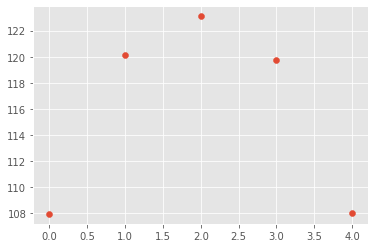

[0, 1, 2, 3, 4]
[107.97363023854307, 120.10006025353512, 123.08718021168133, 119.71462194278942, 108.03238687809068]


In [65]:
# Correction Matrix Plot
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
plt.scatter(x, y)
plt.show()
print(x)
print(y)

In the above graph, x axis represents the absolute difference between predicted rating and actual rating, y axis represents the average review length.

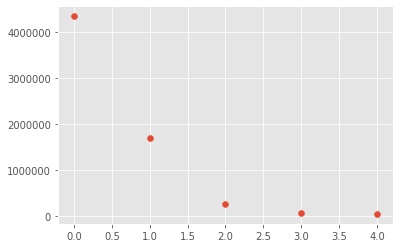

In [72]:
# Correction Matrix Plot
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
plt.scatter(x, z)
plt.show()

In the above graph, x axis represents the absolute difference between predicted rating and actual rating, y axis represents the number of data. We can clearly see a long tail.

In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))

0.6781454753644041


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         1.0       0.74      0.87      0.80    955680
         2.0       0.48      0.29      0.36    519996
         3.0       0.51      0.34      0.41    714429
         4.0       0.54      0.40      0.46   1420467
         5.0       0.74      0.92      0.82   2789192

    accuracy                           0.68   6399764
   macro avg       0.60      0.56      0.57   6399764
weighted avg       0.65      0.68      0.65   6399764



From this result, we can see the model is biased to different ratings. Particularly for ratings 2,3,4 , their accuracy is much lower than 1 and 5. Maybe we should train the model on balanced dataset.

In [14]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, preds))

[[ 827830   67754   22113   10159   27824]
 [ 191425  150029  108190   41257   29095]
 [  59815   76962  240194  233067  104391]
 [  18330   14996   83699  564760  738682]
 [  15249    3174   12245  201366 2557158]]


### balanced testing 
We have more examples of texts that typically have a 5-star rating than texts that typically have a 2-star rating. Because of the probabilistic models at the base of most machine learning classifiers, we’ll get less biased predictions if we train the system on balanced data. This means that ideally we should have the same number of examples of each review type.

In [23]:
ratings['rating'].value_counts()

5.0    2933082
4.0    1468985
1.0    1002159
3.0     739280
2.0     542394
Name: rating, dtype: int64

In [15]:
from collections import Counter

def balance_classes(xs, ys):
    freqs = Counter(ys)

    # the least common class is the maximum number we want for all classes
    max_allowable = freqs.most_common()[-1][1]
    num_added = {clss: 0 for clss in freqs.keys()}
    new_ys = []
    new_xs = []
    for i, y in enumerate(ys):
        if num_added[y] < max_allowable:
            new_ys.append(y)
            new_xs.append(xs[i])
            num_added[y] += 1
    return new_xs, new_ys


In [16]:
balanced_x, balanced_y = balance_classes(ratings.reviews, ratings.rating)
print(Counter(balanced_y))

t1 = datetime.now()

vectors1 = vectorizer.transform(balanced_x)
print(datetime.now() - t1)

Counter({1.0: 542394, 5.0: 542394, 4.0: 542394, 3.0: 542394, 2.0: 542394})
0:14:40.386600


In [17]:
vectors1.shape

(2711970, 26536440)

In [18]:
# initialise the SVM classifier
classifier1 = LinearSVC()

# train the classifier
t1 = datetime.now()
classifier1.fit(vectors1, balanced_y)
vector2=vectorizer.transform(remaining_ratings.reviews)

print(datetime.now() - t1)

0:49:33.747730


In [40]:
preds2=classifier1.predict(vector2)
print(accuracy_score(y_test, preds2))
print(classification_report(y_test, preds2))

0.7981105240755753
              precision    recall  f1-score   support

         1.0       0.94      0.89      0.91    955680
         2.0       0.72      0.95      0.82    519996
         3.0       0.69      0.83      0.75    714429
         4.0       0.64      0.69      0.66   1420467
         5.0       0.90      0.79      0.84   2789192

    accuracy                           0.80   6399764
   macro avg       0.78      0.83      0.80   6399764
weighted avg       0.81      0.80      0.80   6399764



Clearly, a balanced train test will have much higher accuracy result and the score for each category improves greatly.

In [41]:
testing_result_df1=pd.DataFrame({'prediction':preds2,'actual':y_test})
testing_result_df1['difference'] = testing_result_df1['prediction'] - testing_result_df1['actual'] 

In [73]:
def compute_average_word_num1(i):
    a=ratings.loc[testing_result_df.loc[abs(testing_result_df1['difference']) == i].index.tolist()].reviews
    word_sum=0
    for j in a:
        word_sum+=len(j.split())
    avg_word_num=word_sum/len(a)
    return i,avg_word_num,len(a)
x=[]
y=[]
z=[]
for k in range(5):
    x.append(compute_average_word_num1(k)[0])
    y.append(compute_average_word_num1(k)[1])
    z.append(compute_average_word_num1(k)[2])

In [68]:
for k in range(5):
    print(compute_average_word_num1(k))

(0, 111.77850876291355)
(1, 111.10453237628231)
(2, 121.82855749786187)
(3, 122.23673484650189)
(4, 115.16324916978546)


In [69]:
import numpy as np
np.corrcoef(x,y)

array([[1.        , 0.52912653],
       [0.52912653, 1.        ]])

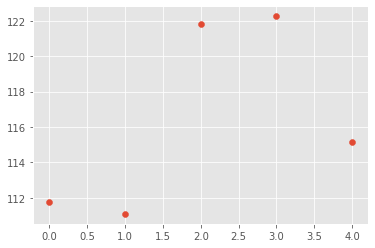

[0, 1, 2, 3, 4]
[111.77850876291355, 111.10453237628231, 121.82855749786187, 122.23673484650189, 115.16324916978546]


In [70]:
# Correction Matrix Plot
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
plt.scatter(x, y)
plt.show()
print(x)
print(y)

Combine the graph with the graph we produced for the last test, we can clearly see that when a review is short, it is likely to predict correctly or completely wrong since short reviews may contain core information and there is less information in it. Sometimes people will directly give their opinion in a short sentence. But at the same time, less information may lead to incorrect prediction.<br>
However, when the review is long, it is unlikely to predict correctly since there are many texts in it and it's more complacited to predict the true meaning of the review.

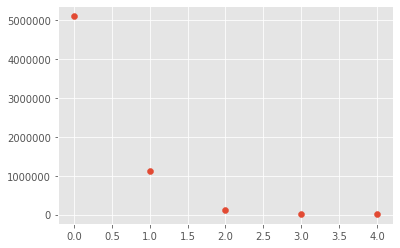

In [74]:
# Correction Matrix Plot
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
plt.scatter(x, z)
plt.show()

In the above graph, x axis represents the absolute difference between predicted rating and actual rating, y axis represents the number of data. We can clearly see a long tail.